In [1]:
# ===== CELL 1: Check GPU =====
import torch
print(f"GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("WARNING: No GPU detected! Training will be very slow.")

GPU Available: True
GPU Name: Tesla T4
GPU Memory: 15.83 GB


In [2]:
# ===== CELL 2: Clone Repository =====
!git clone https://github.com/emaadiliX/salient-object-detection.git
%cd salient-object-detection

Cloning into 'salient-object-detection'...
remote: Enumerating objects: 82, done.
remote: Total 82 (delta 0), reused 0 (delta 0), pack-reused 82 (from 1)
Receiving objects: 100% (82/82), 47.90 MiB | 39.98 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/salient-object-detection


In [3]:
# Verify files
!ls -la
%cd src
!ls -la

total 8988
drwxr-xr-x 4 root root    4096 Nov 25 18:37 .
drwxr-xr-x 1 root root    4096 Nov 25 18:37 ..
-rw-r--r-- 1 root root 9032629 Nov 25 18:37 best_model.pth
-rw-r--r-- 1 root root  145826 Nov 25 18:37 demo.ipynb
drwxr-xr-x 8 root root    4096 Nov 25 18:37 .git
-rw-r--r-- 1 root root      62 Nov 25 18:37 .gitignore
drwxr-xr-x 2 root root    4096 Nov 25 18:37 src
/content/salient-object-detection/src
total 40
drwxr-xr-x 2 root root 4096 Nov 25 18:37 .
drwxr-xr-x 4 root root 4096 Nov 25 18:37 ..
-rw-r--r-- 1 root root 9887 Nov 25 18:37 data_loader.py
-rw-r--r-- 1 root root 4954 Nov 25 18:37 evaluate.py
-rw-r--r-- 1 root root 3601 Nov 25 18:37 sod_model.py
-rw-r--r-- 1 root root 5471 Nov 25 18:37 train.py


In [4]:
# ===== Create folder structure =====
!mkdir -p data/DUTS/images
!mkdir -p data/DUTS/ground_truth_mask

In [5]:
# Download from a mirror
!wget -O DUTS-TR.zip "http://saliencydetection.net/duts/download/DUTS-TR.zip"

--2025-11-25 18:38:35--  http://saliencydetection.net/duts/download/DUTS-TR.zip
Resolving saliencydetection.net (saliencydetection.net)... 34.176.215.106
Connecting to saliencydetection.net (saliencydetection.net)|34.176.215.106|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://saliencydetection.net/duts/download/DUTS-TR.zip [following]
--2025-11-25 18:38:36--  https://saliencydetection.net/duts/download/DUTS-TR.zip
Connecting to saliencydetection.net (saliencydetection.net)|34.176.215.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270997309 (258M) [application/zip]
Saving to: ‘DUTS-TR.zip’

DUTS-TR.zip         100%[===================>] 258.44M  16.1MB/s    in 18s     

2025-11-25 18:38:54 (14.8 MB/s) - ‘DUTS-TR.zip’ saved [270997309/270997309]



In [6]:
# Extract
!unzip -q DUTS-TR.zip
!mv DUTS-TR/DUTS-TR-Image/* data/DUTS/images/
!mv DUTS-TR/DUTS-TR-Mask/* data/DUTS/ground_truth_mask/
!rm -rf DUTS-TR DUTS-TR.zip

In [7]:
# ===== Verify =====
import gdown
import os

num_images = len(os.listdir('data/DUTS/images'))
num_masks = len(os.listdir('data/DUTS/ground_truth_mask'))

print(f"Images: {num_images}")
print(f"Masks: {num_masks}")

if num_images == num_masks == 10553:
    print("Dataset ready for training!")
else:
    print("Warning: Image and mask counts don't match!")

Images: 10553
Masks: 10553
Dataset ready for training!


In [8]:
print("PREPROCESSING 10,553 IMAGES TO 224x224")

from data_loader import resize_images, resize_masks
import time

start = time.time()

print('Resizing images...')
resize_images('data/DUTS/images', 'data/DUTS/resized_images_224', 224)

print('\nResizing masks...')
resize_masks('data/DUTS/ground_truth_mask', 'data/DUTS/resized_masks_224', 224)

elapsed = time.time() - start
print(f'\n✓ Preprocessing complete in {elapsed/60:.1f} minutes!')

Streaming output truncated to the last 5000 lines.
Resized: n07930864_6873.png
Resized: n04357314_1388.png
Resized: n03710721_16768.png
Resized: n04256520_1530.png
Resized: n07768694_32256.png
Resized: n02165456_21312.png
Resized: n03127747_6771.png
Resized: n07718747_8217.png
Resized: ILSVRC2012_test_00010241.png
Resized: n07697313_8181.png
Resized: n03761084_1998.png
Resized: sun_acycswpxhczociyz.png
Resized: n02802426_8153.png
Resized: n03400231_799.png
Resized: n07747607_62859.png
Resized: n03797390_1147.png
Resized: n03710721_15791.png
Resized: ILSVRC2014_train_00001758.png
Resized: n04026417_37554.png
Resized: n02108915_1958.png
Resized: n04285008_4134.png
Resized: n04019541_6033.png
Resized: ILSVRC2012_test_00003917.png
Resized: ILSVRC2012_test_00064901.png
Resized: n03131574_6091.png
Resized: n07749582_3049.png
Resized: n07583066_2306.png
Resized: n03769881_2059.png
Resized: n06874185_5556.png
Resized: ILSVRC2014_train_00015892.png
Resized: sun_aiifkeedzpgegfwe.png
Resized: n07

In [9]:
# Update paths to use DUTS at 224x224
!sed -i 's|data/ECSSD/resized_images_128|data/DUTS/resized_images_224|g' train.py
!sed -i 's|data/ECSSD/resized_masks_128|data/DUTS/resized_masks_224|g' train.py

# Optimize for GPU
!sed -i 's/batch_size=16/batch_size=32/g' train.py
!sed -i 's/epochs=25/epochs=50/g' train.py
!sed -i 's/patience=5/patience=8/g' train.py


# Verify the changes
!grep "image_folder" train.py | head -1
!grep "batch_size" train.py | head -1
!grep "epochs=" train.py | head -1

        image_folder='data/DUTS/resized_images_224',
        train_pairs, val_pairs, test_pairs, batch_size=32
def train_model(model, train_loader, val_loader, optimizer, epochs=50, patience=8, checkpoint_path='checkpoint.pth'):


In [10]:
print("STARTING TRAINING ON DUTS")
print("Dataset: 10,553 images at 224x224")
print("Train/Val/Test: 70%/15%/15%")
print("Epochs: 50 (with early stopping)")
print("Batch size: 32")

!python train.py


STARTING TRAINING ON DUTS
Dataset: 10,553 images at 224x224
Train/Val/Test: 70%/15%/15%
Epochs: 50 (with early stopping)
Batch size: 32
Dataset split: Train=7387, Val=1583, Test=1583
Detected OS: Linux → num_workers=2
DataLoaders created:
  Train: 231 batches (7387 samples)
  Val: 50 batches (1583 samples)
  Test: 50 batches (1583 samples)

Starting training...
Using device: cuda
Epoch 1/50 - Train Loss: 1.1789, Train IoU: 0.3312, Val Loss: 1.1345, Val IoU: 0.3663, LR: 0.001000
  Saved best model
Epoch 2/50 - Train Loss: 1.1164, Train IoU: 0.3625, Val Loss: 1.0836, Val IoU: 0.3646, LR: 0.001000
  Saved best model
Epoch 3/50 - Train Loss: 1.0940, Train IoU: 0.3762, Val Loss: 1.1655, Val IoU: 0.3799, LR: 0.001000
  No improvement (1/8)
Epoch 4/50 - Train Loss: 1.0732, Train IoU: 0.3869, Val Loss: 1.0532, Val IoU: 0.3678, LR: 0.001000
  Saved best model
Epoch 5/50 - Train Loss: 1.0569, Train IoU: 0.3963, Val Loss: 1.0608, Val IoU: 0.4105, LR: 0.001000
  No improvement (1/8)
Epoch 6/50 - T

Updating evaluate.py...
Done

Running evaluation on test set...
Dataset split: Train=7387, Val=1583, Test=1583
Detected OS: Linux → num_workers=2
DataLoaders created:
  Train: 231 batches (7387 samples)
  Val: 50 batches (1583 samples)
  Test: 50 batches (1583 samples)

Test Set Evaluation Results
IoU (Intersection over Union): 0.5918
Precision:                     0.7250
Recall:                        0.7643
F1-Score:                      0.7429
Mean Absolute Error:           0.1689

Generating visualizations...
Visualizations saved to 'visualizations/' folder

Showing sample predictions:


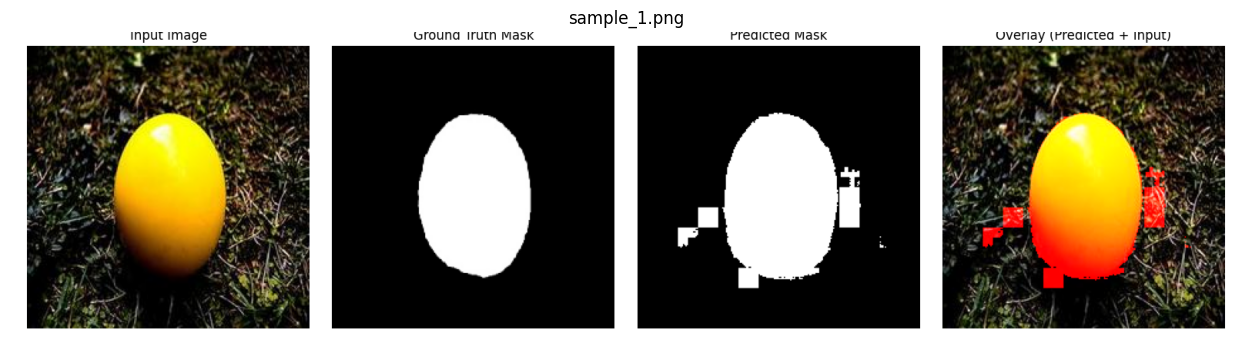

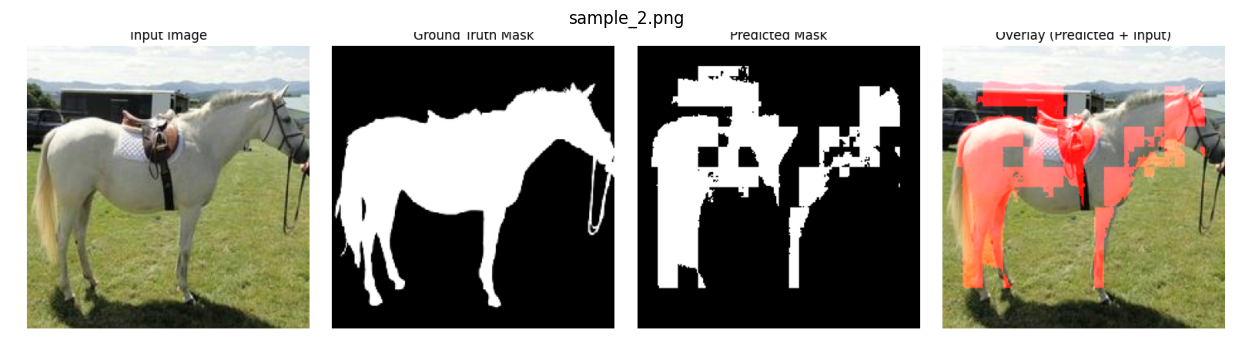

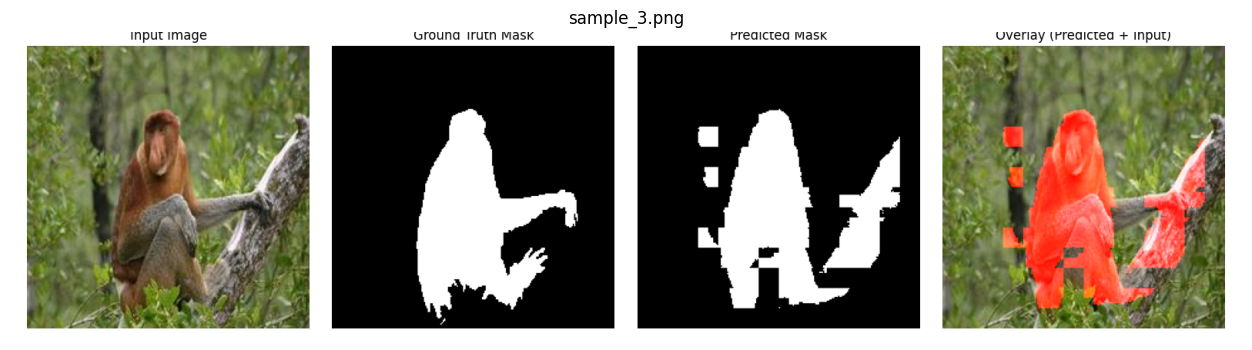

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Complete


In [11]:
# After training - evaluation and download

# Update evaluate.py for DUTS
print("Updating evaluate.py...")

!sed -i 's|data/ECSSD/resized_images_128|data/DUTS/resized_images_224|g' evaluate.py
!sed -i 's|data/ECSSD/resized_masks_128|data/DUTS/resized_masks_224|g' evaluate.py
!sed -i 's/batch_size=16/batch_size=32/g' evaluate.py

print("Done\n")

# Run evaluation
print("Running evaluation on test set...")
!python evaluate.py

# Show sample visualizations
print("\nShowing sample predictions:")

import matplotlib.pyplot as plt
from PIL import Image
import os

viz_folder = 'visualizations'
if os.path.exists(viz_folder):
    samples = sorted([f for f in os.listdir(viz_folder) if f.endswith('.png')])

    for sample in samples[:3]:
        img = Image.open(os.path.join(viz_folder, sample))
        plt.figure(figsize=(16, 4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(sample)
        plt.show()

# Download results
print("\nDownloading results...")

from google.colab import files

files.download('best_model.pth')

!zip -q -r visualizations.zip visualizations/
files.download('visualizations.zip')

print("Complete")